#### Análise e implementação modelo Random Forest Regressor

In [1]:
#instalação dos componetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #biblioteca utilizada para construção de gráficos
import seaborn as sns #biblioteca utilizada para o plot dos gráficos de forma mais "bonita"


In [2]:
# importando dados rais binarizado
df_vc_jovens_ql_bn = pd.read_csv('dados_rais/dados_rais_jovens_ql.csv', sep =',', encoding='utf-8')

In [3]:
df_vc_jovens_ql_bn.columns

Index(['ano', 'uf', 'municipio', 'cnae_20_divisao', 'raca_cor_1', 'raca_cor_2',
       'raca_cor_4', 'raca_cor_6', 'raca_cor_8', 'raca_cor_9', 'raca_cor_99',
       'sexo_trabalhador_1', 'sexo_trabalhador_2', 'sexo_trabalhador_9',
       'escolaridade_apos_2005_1', 'escolaridade_apos_2005_2',
       'escolaridade_apos_2005_3', 'escolaridade_apos_2005_4',
       'escolaridade_apos_2005_5', 'escolaridade_apos_2005_6',
       'escolaridade_apos_2005_7', 'escolaridade_apos_2005_8',
       'escolaridade_apos_2005_9', 'escolaridade_apos_2005_10',
       'escolaridade_apos_2005_11', 'escolaridade_apos_2005_99',
       'vl_remun_media_nom', 'faixa_etaria_2', 'faixa_etaria_3',
       'faixa_etaria_4', 'tipo_vinculo_10', 'tipo_vinculo_15',
       'tipo_vinculo_20', 'tipo_vinculo_25', 'tipo_vinculo_30',
       'tipo_vinculo_31', 'tipo_vinculo_35', 'tipo_vinculo_40',
       'tipo_vinculo_50', 'tipo_vinculo_55', 'tipo_vinculo_60',
       'tipo_vinculo_65', 'tipo_vinculo_70', 'tipo_vinculo_75',
    

In [4]:
df_vc_jovens_ql_bn.shape

(663677, 64)

Análise Geral: \
QL ≤ 0,49 localização fraca = 0\
QL 0,50 ≤ 0,99 localização média = 1\
QL ≥ 1 localização significativa = 2

##### Modelo de classificação

In [5]:
df_vc_ql_2020 = df_vc_jovens_ql_bn.query('ano == 2020')

In [6]:
# Selecionar colunas mais relevantes no Modelo.
df_vc_ql_2020 = df_vc_ql_2020.loc[:,['qt_vc_munic', 'qt_vc_divisao_uf', 'cnae_20_divisao', 'municipio', 'vl_remun_media_nom', 'qt_vc_divisao_munic', 'qt_vc_uf', 'uf','quociente_locacional', 'classificacao_ql']]

In [7]:

df_vc_ql_2020.columns

Index(['qt_vc_munic', 'qt_vc_divisao_uf', 'cnae_20_divisao', 'municipio',
       'vl_remun_media_nom', 'qt_vc_divisao_munic', 'qt_vc_uf', 'uf',
       'quociente_locacional', 'classificacao_ql'],
      dtype='object')

In [8]:
# armazenando os labels em um array
labels = np.array(df_vc_ql_2020['classificacao_ql'])

# salvando a ordem das features
feature_list = list(df_vc_ql_2020.columns)

In [9]:
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [10]:
# removendo a coluna de labels do df original
df_vinculos_class = df_vc_ql_2020.drop(['quociente_locacional', 'classificacao_ql'], axis = 1)
# check
df_vinculos_class.columns

Index(['qt_vc_munic', 'qt_vc_divisao_uf', 'cnae_20_divisao', 'municipio',
       'vl_remun_media_nom', 'qt_vc_divisao_munic', 'qt_vc_uf', 'uf'],
      dtype='object')

In [11]:
# convertendo df_vinculos_class para array
data = np.array(df_vinculos_class)

In [12]:
data.shape

(130859, 8)

In [13]:
labels.shape

(130859,)

In [14]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
#lab = preprocessing.LabelEncoder()
#labels = lab.fit_transform(labels)

# Random Forest Classifiers

In [15]:
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split

# aplicando a funcao train_test_split para separar os conjuntos de treino e 
# teste segundo uma porcentagem de separação definida. 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 42)

In [16]:
# importar o modelo Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier

In [17]:
# treinando o modelo 
classifier = RandomForestClassifier(n_estimators= 100, random_state=42).fit(train_data, train_labels);

In [18]:
# Obter a importância das características
importancias = classifier.feature_importances_

# Criar um DataFrame para visualizar melhor as importâncias
caracteristicas_df = pd.DataFrame({
    'Caracteristica': df_vinculos_class.columns,
    'Importancia': importancias
})

# Ordenar o DataFrame pela importância de forma decrescente
caracteristicas_df.sort_values(by='Importancia', ascending=False, inplace=True)

caracteristicas_df.head(5)

,Caracteristica,Importancia
0,qt_vc_munic,0.263970
5,qt_vc_divisao_munic,0.227513
1,qt_vc_divisao_uf,0.171730
4,vl_remun_media_nom,0.092468
3,municipio,0.089069


Aprendizado - o modelo melhorou os resultdos após a seleção das colunas mais relevantes para o modelo. O número grande de colunas binarizadas não ajudou no modelo.

In [19]:
# Colunas mais relevantes do modelo.
#'qt_vc_munic', 'qt_vc_divisao_uf', 'cnae_20_divisao', 'municipio', 'vl_remun_media_nom', 'qt_vc_divisao_munic', 'qt_vc_uf', 'uf'

In [20]:
# aplicando o modelo treinado para a previsão do resultado do teste
predictions_labels = classifier.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions_labels})  
p.head(10)

,Real,Previsto
0,2,2
1,1,1
2,0,0
3,1,1
4,2,2
5,2,2
6,2,1
7,2,1
8,0,0
9,2,2


In [21]:
#avaliando o modelo 
from sklearn import metrics

In [22]:
#avaliando o modelo
print('Matriz de Confusão\n', metrics.confusion_matrix(test_labels, predictions_labels)) 


Matriz de Confusão
 [[10120   740    93]
 [  662  4961  1499]
 [   97   695 13848]]


In [23]:
print('\nClassification Report\n', metrics.classification_report(test_labels, predictions_labels)) 


Classification Report
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     10953
           1       0.78      0.70      0.73      7122
           2       0.90      0.95      0.92     14640

    accuracy                           0.88     32715
   macro avg       0.87      0.86      0.86     32715
weighted avg       0.88      0.88      0.88     32715



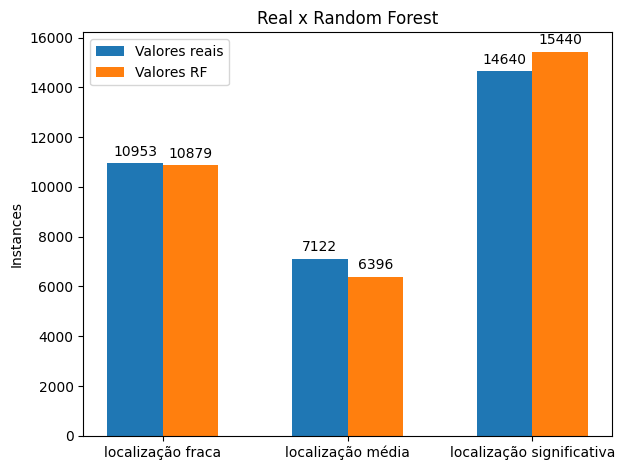

In [24]:
#criando labels e os valores armazenados nas barras
labels = ['localização fraca', 'localização média', 'localização significativa']
count_test = [(test_labels == 0).sum(), (test_labels == 1).sum(), (test_labels == 2).sum()]
count_rf = [(predictions_labels == 0).sum(), (predictions_labels == 1).sum(), (predictions_labels == 2).sum()]

#criando as barras
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

#criancdo os plots
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count_test, width, label='Valores reais')
rects2 = ax.bar(x + width/2, count_rf, width, label='Valores RF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Instances')
ax.set_title('Real x Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#plotando o grafico de barras agrupadas
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

Reprodução do modelo para o Ano de 2022

In [25]:
df_vc_ql_2022 = df_vc_jovens_ql_bn.query('ano == 2022').copy()

In [26]:
# Selecionar colunas mais relevantes no Modelo.
df_vc_ql_2022 = df_vc_ql_2022.loc[:,['qt_vc_munic', 'qt_vc_divisao_uf', 'cnae_20_divisao', 'municipio', 'vl_remun_media_nom', 'qt_vc_divisao_munic', 'qt_vc_uf', 'uf','quociente_locacional', 'classificacao_ql']]

In [27]:
# armazenando os labels em um array
labels22 = np.array(df_vc_ql_2022['classificacao_ql'])

# salvando a ordem das features
feature_list22 = list(df_vc_ql_2022.columns)

In [28]:
# removendo a coluna de labels do df original
df_vinculos_class22 = df_vc_ql_2022.drop(['quociente_locacional', 'classificacao_ql'], axis = 1)
# check
df_vinculos_class22.columns

Index(['qt_vc_munic', 'qt_vc_divisao_uf', 'cnae_20_divisao', 'municipio',
       'vl_remun_media_nom', 'qt_vc_divisao_munic', 'qt_vc_uf', 'uf'],
      dtype='object')

In [29]:
# convertendo df_vinculos_class para array
data22 = np.array(df_vinculos_class22)

In [30]:
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split

# aplicando a funcao train_test_split para separar os conjuntos de treino e 
# teste segundo uma porcentagem de separação definida. 
train_data2, test_data2, train_labels2, test_labels2 = train_test_split(data22, labels22, test_size = 0.25, random_state = 42)

In [31]:
# treinando o modelo 
classifier2 = RandomForestClassifier(n_estimators= 100, random_state=42).fit(train_data2, train_labels2);

In [32]:
# aplicando o modelo treinado para a previsão do resultado do teste
predictions_labels2 = classifier2.predict(test_data2)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels2, 'Previsto': predictions_labels2})  
p.head(10)

,Real,Previsto
0,2,2
1,0,0
2,0,0
3,2,2
4,1,1
5,0,1
6,0,0
7,0,0
8,1,1
9,1,1


In [33]:
#avaliando o modelo
print('Matriz de Confusão\n', metrics.confusion_matrix(test_labels2, predictions_labels2)) 

print('\nClassification Report\n', metrics.classification_report(test_labels2, predictions_labels2)) 

Matriz de Confusão
 [[10868   694    84]
 [  705  5344  1345]
 [  106   707 13549]]

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11646
           1       0.79      0.72      0.76      7394
           2       0.90      0.94      0.92     14362

    accuracy                           0.89     33402
   macro avg       0.88      0.87      0.87     33402
weighted avg       0.89      0.89      0.89     33402

